In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ouverture du fichier 
df = pd.read_csv("data/labels.csv",",",encoding='utf-8', low_memory=False)

df['tweet_message_treat'] = [[''.join(e for e in word if e.isalnum()) for word in tweet.split(' ') if word.find("@") == -1 and word.find("RT")] for tweet in df['tweet']]
df['tweet_message'] = df['tweet_message_treat'].apply(' '.join)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           24783 non-null  int64 
 1   count                24783 non-null  int64 
 2   hate_speech          24783 non-null  int64 
 3   offensive_language   24783 non-null  int64 
 4   neither              24783 non-null  int64 
 5   class                24783 non-null  int64 
 6   tweet                24783 non-null  object
 7   tweet_message_treat  24783 non-null  object
 8   tweet_message        24783 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.7+ MB


In [11]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_message_treat,tweet_message
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[, As, a, woman, you, shouldnt, complain, abou...",As a woman you shouldnt complain about cleani...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[, boy, dats, coldtyga, dwn, bad, for, cuffin,...",boy dats coldtyga dwn bad for cuffin dat hoe ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[, Dawg, You, ever, fuck, a, bitch, and, she, ...",Dawg You ever fuck a bitch and she start to c...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[, she, look, like, a, tranny]",she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[, The, shit, you, hear, about, me, might, be,...",The shit you hear about me might be true or i...
...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,"[yous, a, muthafin, lie, right, His, TL, is, t...",yous a muthafin lie right His TL is trash 8230...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...","[youve, gone, and, broke, the, wrong, heart, b...",youve gone and broke the wrong heart baby and ...
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,"[young, buck, wanna, eat, dat, nigguh, like, I...",young buck wanna eat dat nigguh like I aint fu...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,"[youu, got, wild, bitches, tellin, you, lies]",youu got wild bitches tellin you lies


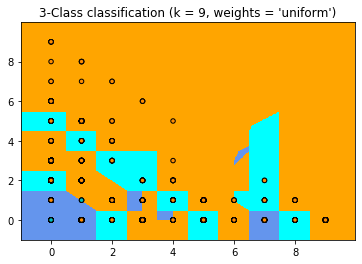

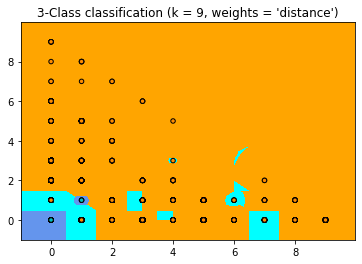

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

dfML = pd.DataFrame(data={'offensive_language':df['offensive_language'],'neither':df['neither']})

n_neighbors = 9

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = np.array(dfML.values.tolist())
y = np.array(df['hate_speech'].tolist())

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = df[['neither','hate_speech','offensive_language']]
y = df['tweet_message']

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [ ]:
model = LinearRegression()
model.fit(df[['Experince','In_France','In_Germany','In_Spain']],df['Salary'])
model.predict(df[['Experince','In_France','In_Germany','In_Spain']])

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ouverture du fichier 
df = pd.read_csv("data/labels.csv",",",encoding='utf-8', low_memory=False)

    
df['tweet_tab_message'] = [[word for word in tweet.split(' ')] for tweet in df['tweet']]
df['tweet_message_treat'] = [[''.join(e for e in word if e.isalnum()) for word in tweet.split(' ') if word.find("@") == -1 and word.find("RT")] for tweet in df['tweet']]
df['tweet_tab_tag'] = [[word for word in tweet.split(' ') if word.find("@") != -1] for tweet in df['tweet']]
df['tweet_tab_message_with_out_special_char'] = [[''.join(e for e in word if e.isalnum()) for word in tweet.split(' ') if word.find("@") == -1] for tweet in df['tweet']]
df['tweet_message'] = df['tweet_message_treat'].apply(' '.join)
df['tweet_message'] = df['tweet_message'].replace('RT','')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               24783 non-null  int64 
 1   count                                    24783 non-null  int64 
 2   hate_speech                              24783 non-null  int64 
 3   offensive_language                       24783 non-null  int64 
 4   neither                                  24783 non-null  int64 
 5   class                                    24783 non-null  int64 
 6   tweet                                    24783 non-null  object
 7   tweet_tab_message                        24783 non-null  object
 8   tweet_message_treat                      24783 non-null  object
 9   tweet_tab_tag                            24783 non-null  object
 10  tweet_tab_message_with_out_special_char  24783 non-null  o

In [6]:
df['tweet_message'][0]

' As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out'

In [ ]:
# Linear SVC Model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X = df[['hate_speech','offensive_language','neither']]
y = df['tweet_message']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))

clf.fit(X_train, y_train)
print(clf.named_steps['linearsvc'].coef_)

print(clf.named_steps['linearsvc'].intercept_)

print(clf.predict([['test','pussy']]))



In [7]:
# Naives Bayes Model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = df[['hate_speech','offensive_language','neither','class']]
y = df['tweet_message']
# X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12392 points : 12390


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

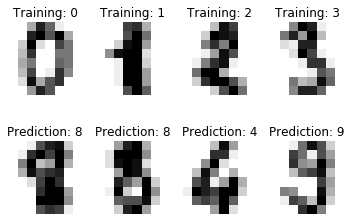

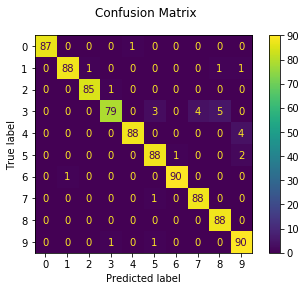

In [38]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()